# SPY Data Exploration

## Data Collection
To fetch the data, we will be using teh Yahoo Finance API (`yfinance`).

In order to reduce repeated calls to the API, the dataset will be stored locally in `data/` as a CSV file named `spy-etf.csv`.

In [18]:
import os

import pandas as pd
import yfinance as yf

FILE_PATH = '../data/spy-etf.csv'


if not os.path.exists(FILE_PATH):
    data = yf.download('SPY')
    data.to_csv(FILE_PATH)

Summary of the dataset:

In [19]:
data = pd.read_csv(FILE_PATH, index_col='Date', parse_dates=True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7780 entries, 1993-01-29 to 2023-12-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7780 non-null   float64
 1   High       7780 non-null   float64
 2   Low        7780 non-null   float64
 3   Close      7780 non-null   float64
 4   Adj Close  7780 non-null   float64
 5   Volume     7780 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 425.5 KB
None


Breakdown of the features in the dataset:
- **Data:** Date for each data entry.
- **Open:** Price at which the stock first traded at the beginning of the trading day.
- **High:** Highest price at which the stock traded during the trading day.
- **Low:** Lowest price at which the stock traded during the trading day.
- **Close:** Price at which the stock last traded during the trading day.
- **Adj Close:** Closing price adjusted for any corporate actions (e.g. dividends, stock splits, or new share issuance).
- **Volume:** Number of shares of the stock traded during the trading day.

## Exploratory Data Analysis
Let's see the statistical summary of the data to get some insights.

In [20]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7780.000000,7780.000000,7780.000000,7780.000000,7780.000000,7.780000e+03
mean,170.215380,171.237461,169.092477,170.223943,141.803437,8.448057e+07
std,106.346432,106.919961,105.739124,106.373361,112.099685,9.236766e+07
min,43.343750,43.531250,42.812500,43.406250,24.540318,5.200000e+03
25%,105.247499,106.191563,104.423124,105.259998,70.603354,1.000975e+07
50%,132.104996,132.938751,131.137497,132.055000,93.439651,6.311990e+07
75%,210.067501,210.922497,209.272503,210.232498,181.036228,1.160144e+08
max,479.220001,479.980011,476.059998,477.709991,474.839996,8.710263e+08


Ensuring data integrity.

In [21]:
print(data.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


### Time Series Analysis

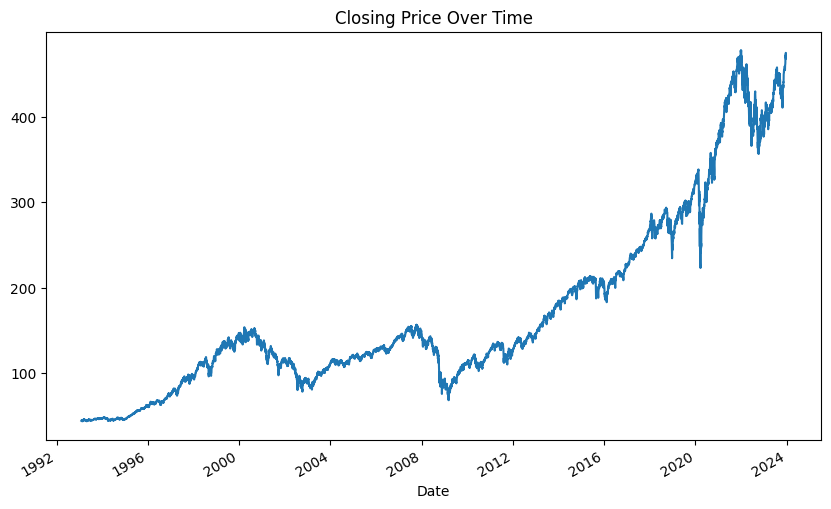

In [22]:
import matplotlib.pyplot as plt

data['Close'].plot(figsize=(10, 6), title='Closing Price Over Time')
plt.show()

### Trading Volume

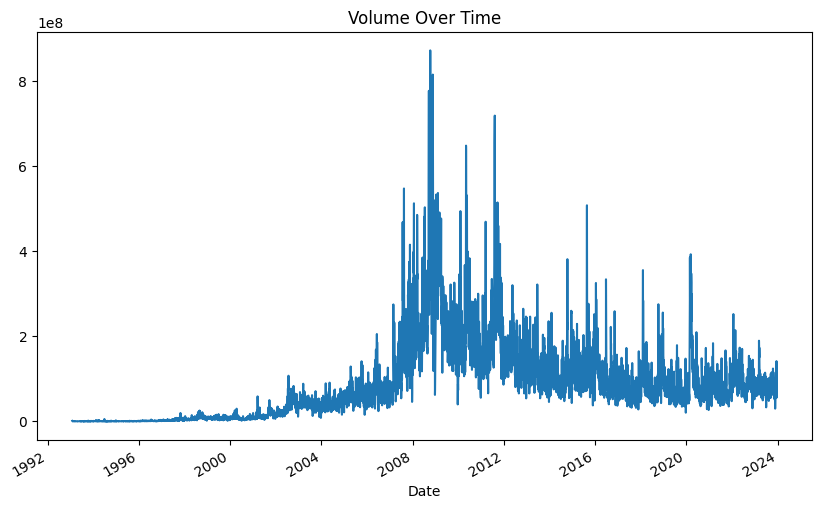

In [23]:
data['Volume'].plot(figsize=(10, 6), title='Volume Over Time')
plt.show()

### Correlation Analysis
Inspection correlation between features to determine most significant features to be included in the model. 

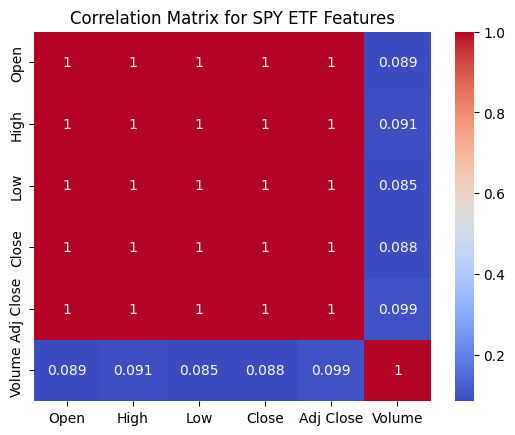

In [24]:
import seaborn as sns

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for SPY ETF Features')
plt.show()

This is expected. Low, high, close and adj. close prices have a perfect positive correlation as they move closely with each other during a trading day.

The correlation between the volume and the other features all below 0.1. However, looking at both 'Close over Time' and 'Volume over Time' graphs, there seems to be a pattern between the two.

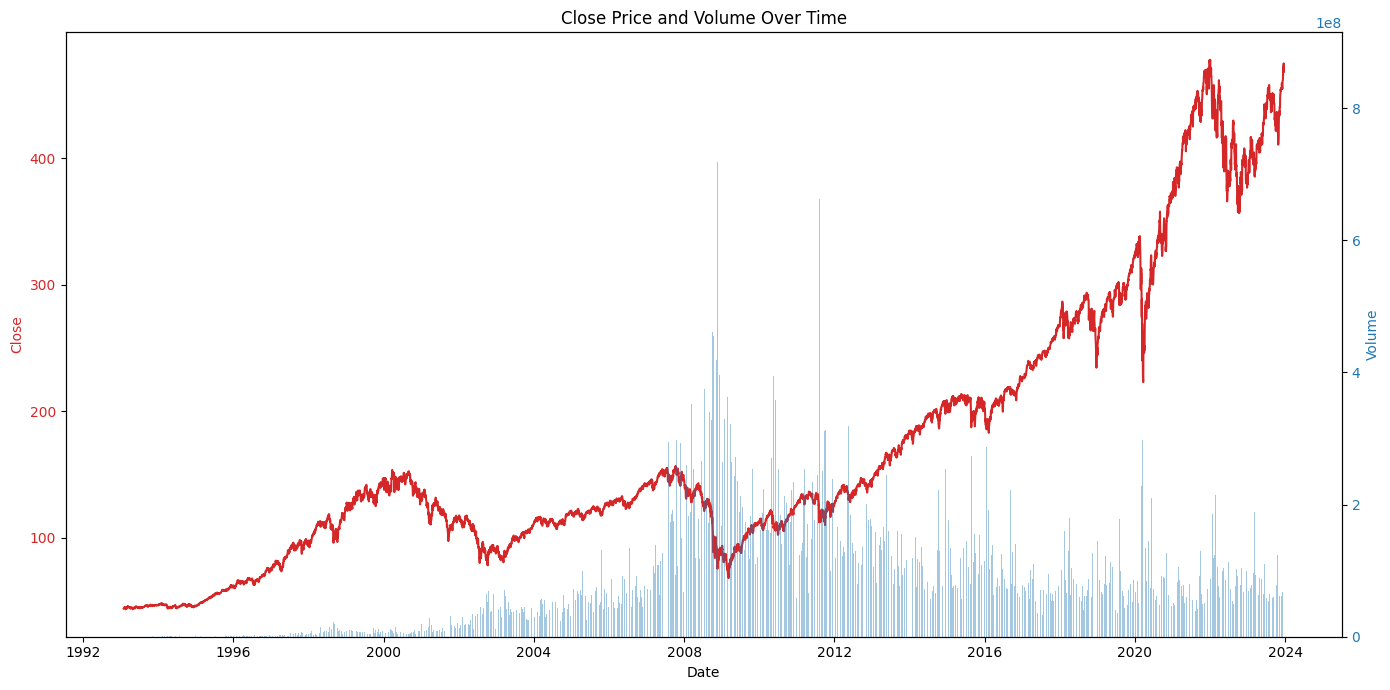

In [25]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the 'Close' on the primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Close', color='tab:red')
ax1.plot(data.index, data['Close'], color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()

# Plot the 'Volume' on the secondary y-axis
ax2.set_ylabel('Volume', color='tab:blue')
ax2.bar(data.index, data['Volume'], alpha=0.4, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Close Price and Volume Over Time')
fig.tight_layout()
plt.show()

Trading volume increases during bear markets. Magnitude of the spike in volume appears to not be correlated with the slope of the stock price. There is no distinct correlation between the two as shown in different parts of the graph were the pattern does not hold.